#### Project Summary

- Use computer vision and AI to scan an image detecting page flips
- recognizes corners and crops pages
- keeps text formatting using contrast between page background
- videos are clipped and labelled to show flip and not flipped
- predict if a page is being flipped using the images

#### Initial Thoughts

- use deep learning environment for computer vision (keras/pytorch/tensorflow) CNN
- set up docker/aws
- preprocess data
- build model
- fit model
- evaluate
- improve model
- save the trained model

docker commands:

docker image ls

docker run  --rm  -p 8888:8888 --gpus all -it -v "H:\Lighthouse Labs\deep_learning":/home/jovyan/work/     jupyter/tensorflow-notebook

####
https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd

#### Code

In [1]:
import tensorflow as tf
import cv2
import os
from matplotlib import pyplot as plt

2023-09-28 01:54:56.906508: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 01:54:56.942336: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 01:54:56.943206: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 01:54:57.634725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


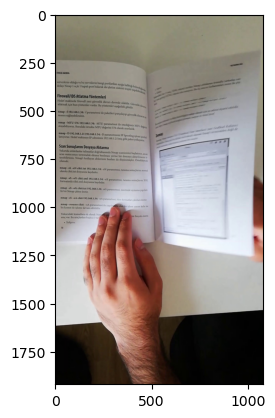

In [2]:
img = cv2.imread(os.path.join("../data/training", 'flip', '0001_000000010.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
import numpy as np

In [4]:
training = tf.keras.utils.image_dataset_from_directory('../data/training')

Found 2392 files belonging to 2 classes.


In [5]:
testing = tf.keras.utils.image_dataset_from_directory('../data/testing')

Found 597 files belonging to 2 classes.


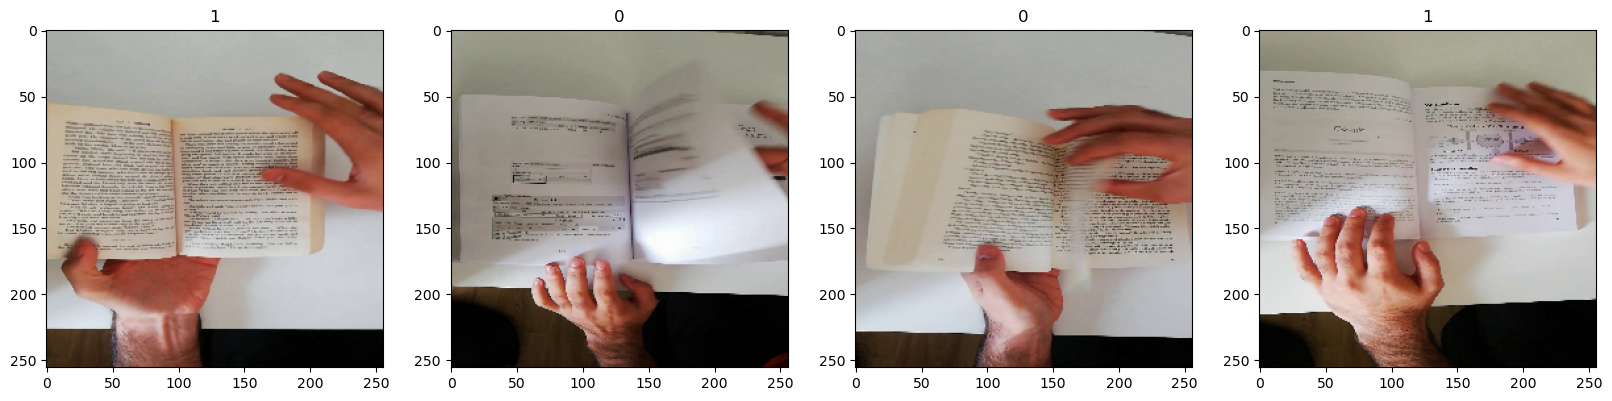

In [6]:
training_iterator = training.as_numpy_iterator()
batch = training_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
training = training.map(lambda x,y: (x/255, y))

In [8]:
testing = testing.map(lambda x,y: (x/255, y))

##### Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [10]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [26]:
logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(training, epochs=10, validation_data=testing, callbacks=[tensorboard_callback])

Epoch 1/10
75/75 [==============================] - 30s 385ms/step - loss: 0.5950 - accuracy: 0.6572 - val_loss: 0.3680 - val_accuracy: 0.8275
Epoch 2/10
75/75 [==============================] - 29s 380ms/step - loss: 0.2368 - accuracy: 0.9018 - val_loss: 0.2283 - val_accuracy: 0.9129
Epoch 3/10
75/75 [==============================] - 29s 381ms/step - loss: 0.1239 - accuracy: 0.9548 - val_loss: 0.1141 - val_accuracy: 0.9581
Epoch 4/10
75/75 [==============================] - 31s 402ms/step - loss: 0.0484 - accuracy: 0.9854 - val_loss: 0.0955 - val_accuracy: 0.9698
Epoch 5/10
75/75 [==============================] - 30s 385ms/step - loss: 0.0483 - accuracy: 0.9845 - val_loss: 0.0827 - val_accuracy: 0.9698
Epoch 6/10
75/75 [==============================] - 30s 387ms/step - loss: 0.0260 - accuracy: 0.9900 - val_loss: 0.0365 - val_accuracy: 0.9916
Epoch 7/10
75/75 [==============================] - 29s 380ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.0645 - val_accuracy: 0.9832

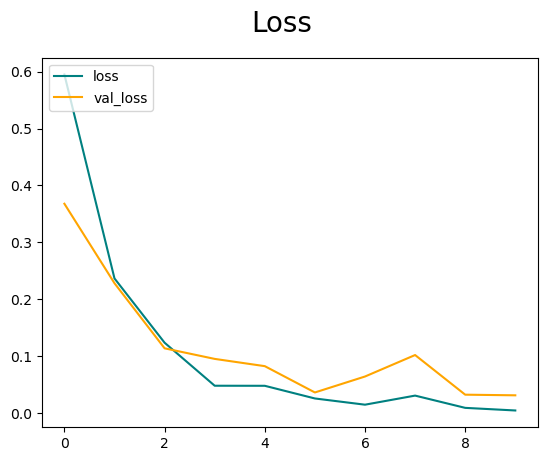

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

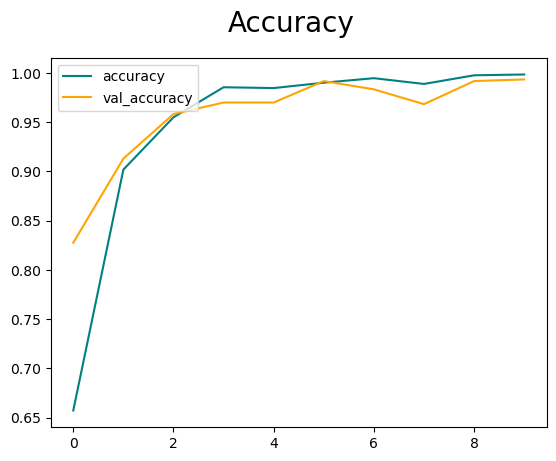

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, F1Score

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
f1 = F1Score(threshold = 0.5)

In [31]:
# from tensorflow.keras.models import load_model
# new_model = load_model('../models/flipclassifier.keras')

In [38]:
for batch in testing.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 54ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9968102, shape=(), dtype=float32) tf.Tensor(0.9904913, shape=(), dtype=float32) tf.Tensor(0.9934747, shape=(), dtype=float32)


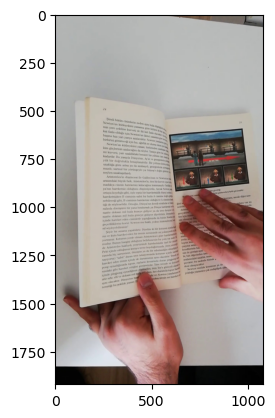

In [40]:
img = cv2.imread('../data/testing/notflip/0031_000000016.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

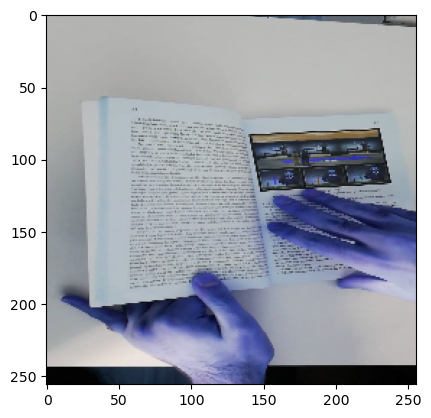

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [43]:
if yhat > 0.5: 
    print(f'Predicted class is notflip')
else:
    print(f'Predicted class is flip')

Predicted class is notflip


In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('../models','flipclassifier.keras'))

In [46]:
new_model = load_model('../models/flipclassifier.keras')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 56ms/step


array([[0.97548324]], dtype=float32)

### Questions: 
Testing set vs validation set. What is the use case for one or the other. In this case, should I have a validation set that is a split of the training set?